<a href="https://colab.research.google.com/github/parthhh-a/Residex-Index-Price-Prediction-for-Banglore/blob/main/Residex_Index_Banglore_HPI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NHB RESIDEX**

---



https://residex.nhbonline.org.in/

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/HPI@Assessment Prices_Index.xlsx')
df.head()

,City,Jun--2013,Sep--2013,Dec--2013,Mar--2014,Jun--2014,Sep--2014,Dec--2014,Mar--2015,Jun--2015,...,Sep- 2020,Dec- 2020,Mar- 2021,Jun- 2021,Sep- 2021,Dec- 2021,Mar- 2022,Jun- 2022,Sep- 2022,Dec- 2022
0,Bengaluru,76,77,78,79,80,81,83,85,86,...,116,116,118,119,119,120,121,123.2,126.12,129.56


In [ ]:
len(df)

1

In [ ]:
x_orig = df.columns
x_orig = np.array(x_orig[1:])
x_orig

array(['Jun--2013', 'Sep--2013', 'Dec--2013', 'Mar--2014', 'Jun--2014',
       'Sep--2014', 'Dec--2014', 'Mar--2015', 'Jun--2015', 'Sep--2015',
       'Dec--2015', 'Mar--2016', 'Jun--2016', 'Sep--2016', 'Dec--2016',
       'Mar--2017', 'Jun--2017', 'Sep--2017', 'Dec--2017', 'Mar--2018',
       'JUN--2018', 'SEP--2018', 'DEC- 2018', 'Mar- 2019', 'Jun- 2019',
       'Sep- 2019', 'Dec- 2019', 'Mar- 2020', 'Jun- 2020', 'Sep- 2020',
       'Dec- 2020', 'Mar- 2021', 'Jun- 2021', 'Sep- 2021', 'Dec- 2021',
       'Mar- 2022', 'Jun- 2022', 'Sep- 2022', 'Dec- 2022'], dtype=object)

In [ ]:
months = {'jan': 1, 'mar': 2, 'jun': 3, 'sep': 4, 'dec': 5}

def srt(arr):
  res = []
  for i in range(len(arr)):
    join = months.get(arr[i][:3].lower())
    res.append(int(str(join)+arr[i][5:]))

  return res

In [ ]:
12022

12022

In [ ]:
months_opp = {'1': 'jan', '2': 'mar', '3': 'jun', '4': 'sep', '5': 'dec'}

def srt_opp(arr):
  res = []
  for i in range(len(arr)):
    check = str(arr[i])[0]
    var = months_opp[check] + '--' + str(arr[i])[1:]
    res.append(var)
  
  return res

In [ ]:
x = srt(x_orig)
x = np.array(x).reshape(1, -1)
x

array([[32013, 42013, 52013, 22014, 32014, 42014, 52014, 22015, 32015,
        42015, 52015, 22016, 32016, 42016, 52016, 22017, 32017, 42017,
        52017, 22018, 32018, 42018, 52018, 22019, 32019, 42019, 52019,
        22020, 32020, 42020, 52020, 22021, 32021, 42021, 52021, 22022,
        32022, 42022, 52022]])

In [ ]:
y = []
for elem in x_orig:
  y.append(df.iloc[0][elem])

y = np.array(y)
y

array([ 76.  ,  77.  ,  78.  ,  79.  ,  80.  ,  81.  ,  83.  ,  85.  ,
        86.  ,  88.  ,  90.  ,  92.  ,  95.  ,  98.  , 100.  , 102.  ,
       100.  ,  97.  ,  99.  ,  99.  , 102.  , 107.  , 109.  , 111.  ,
       113.  , 117.  , 118.  , 117.  , 116.  , 116.  , 116.  , 118.  ,
       119.  , 119.  , 120.  , 121.  , 123.2 , 126.12, 129.56])

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(x.T, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [ ]:
reg.predict([[22022]])

array([101.52068274])

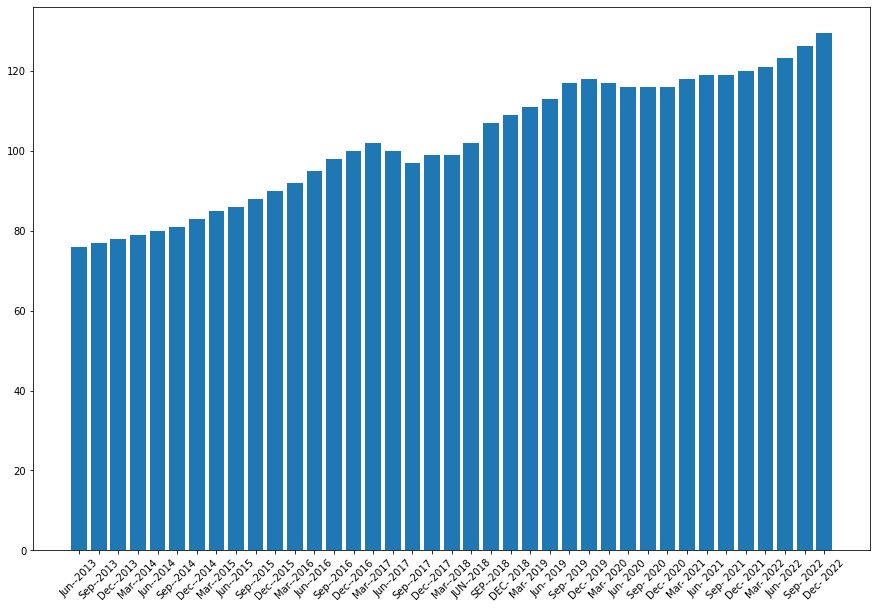

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
plt.bar(x_orig, y);

## Making Predictions

In [ ]:
months

{'jan': 1, 'mar': 2, 'jun': 3, 'sep': 4, 'dec': 5}

In [ ]:
def gen_preds(num):
  new_year = 2023
  new_month = 0

  preds_y = []
  preds_x = []

  for i in range(num):
    new_month += 1
    pred = int(str(new_month) + str(new_year))
    preds_y.append(reg.predict([[pred]])[0])
    preds_x.append(pred)

    if new_month >= 5: 
      new_month = 0
      new_year += 1
    
  return preds_x, preds_y

In [ ]:
new_x, new_y = gen_preds(9)
new_x, new_y

([12023, 22023, 32023, 42023, 52023, 12024, 22024, 32024, 42024],
 [100.84292953609787,
  101.52075051710068,
  102.1985714981035,
  102.87639247910631,
  103.55421346010914,
  100.84299731819597,
  101.52081829919878,
  102.1986392802016,
  102.87646026120441])

In [ ]:
new_x = srt_opp(new_x)

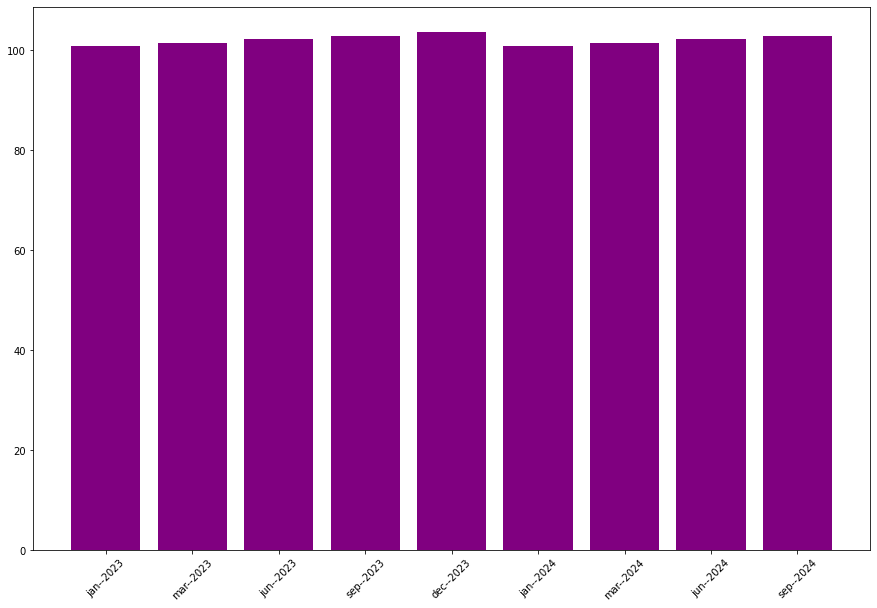

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
plt.bar(new_x, new_y, color='purple');

In [ ]:
def pred_plots(num):
  new_x, new_y = gen_preds(num)
  new_x = srt_opp(new_x)

  plt.figure(figsize=(15, 10))
  plt.xticks(rotation=45)
  plt.bar(new_x, new_y);

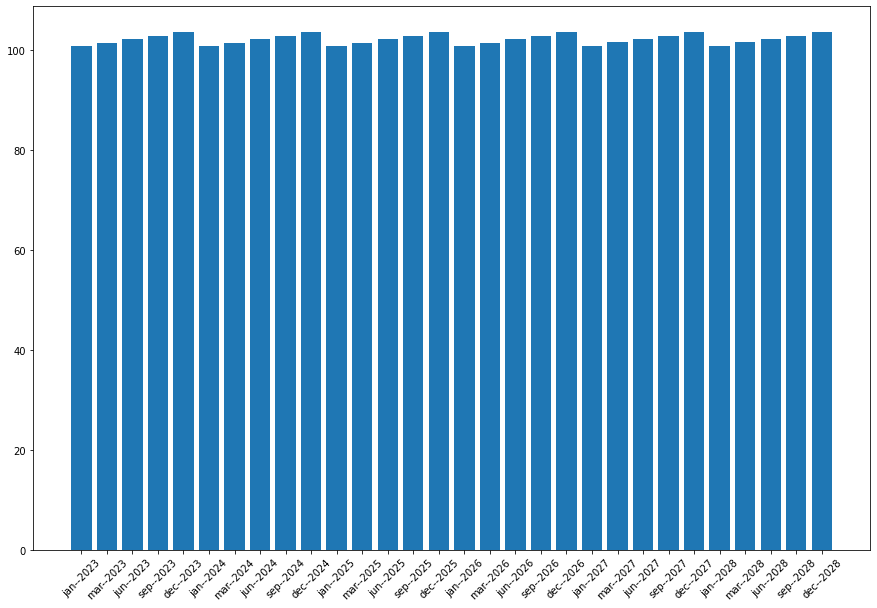

In [ ]:
pred_plots(30)

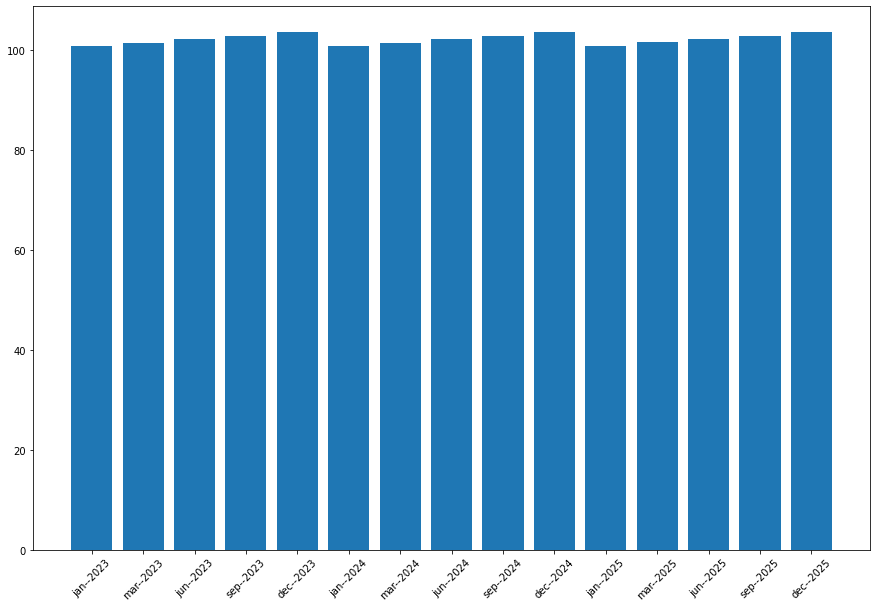

In [ ]:
pred_plots(15)

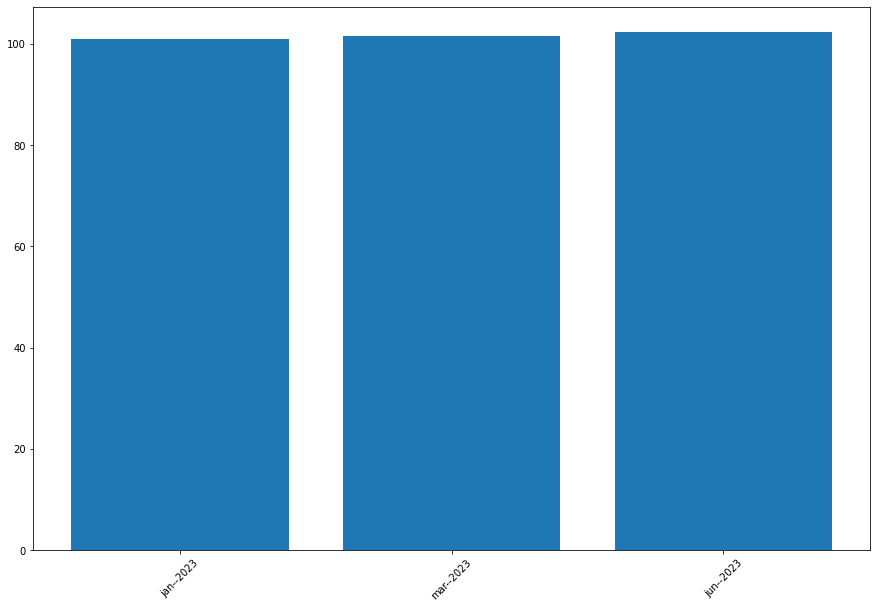

In [ ]:
ax = pred_plots(3)

# Web Interface

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 K

In [ ]:
# UPDATE THE PARAMETERS
new_x, new_y = gen_preds(3)
new_x = srt_opp(new_x)

In [ ]:
import gradio as gr
import pandas as pd

from vega_datasets import data

barley = data.barley()
simple = pd.DataFrame({
    'a': new_x,
    'b': new_y
})

def bar_plot_fn(display):
    if display == "simple":
        return gr.BarPlot.update(
            simple,
            x="a",
            y="b",
            title="Simple Bar Plot with made up data",
            tooltip=['a', 'b'],
            y_lim=[20, 100]
        )
    elif display == "simple-horizontal":
        return gr.BarPlot.update(
            simple,
            x="a",
            y="b",
            x_title="Variable A",
            y_title="Variable B",
            title="Simple Bar Plot with made up data",
            tooltip=['a', 'b'],
            vertical=False,
            y_lim=[20, 100]
        )


with gr.Blocks() as bar_plot:
    with gr.Row():
        with gr.Column():
            display = gr.Dropdown(
                choices=["simple", "simple-horizontal"],
                value="simple",
                label="Type of Bar Plot"
            )
        with gr.Column():
            plot = gr.BarPlot(show_label=False).style(container=True)
    display.change(bar_plot_fn, inputs=display, outputs=plot)
    bar_plot.load(fn=bar_plot_fn, inputs=display, outputs=plot)


In [ ]:
import gradio as gr

with gr.Blocks() as demo:
    bar_plot.render()

if __name__ == "__main__":
    demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7a29a2425343c9a505.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


# Hypothetical Analysis

**Features:** 
1. Demographics (Age, income and life style of the population)
2. Quality of amenities
3. Government policies

**Government policies**: Policy_Change, Stamp_Duty_Change, Zoning_Regulation_Change, Interest_Rate_Change

Economic indicators: Economic indicators such as GDP, inflation rate, and unemployment rate can affect the value of many types of assets, including housing. Including these variables as features in your model could help account for their impact on the trend in the data.

Demographic variables: Demographic variables such as population size, age distribution, and household income can also affect the value of housing. These variables could be particularly important if you are interested in predicting trends in specific geographic areas.

Interest rates: Interest rates can have a significant impact on the housing market, as they affect the cost of borrowing money for a mortgage. Including interest rates as a feature in your model could help account for their impact on the trend in the data.

Real estate market indicators: Other real estate market indicators such as the number of new home construction permits, inventory levels, and average time on market can also affect the value of housing. Including these variables as features in your model could help capture trends in the broader real estate market that are driving the trend in the data.


Environmental factors: Environmental factors such as natural disasters or climate change can also affect the value of housing. Including these variables as features in your model could help account for their impact on the trend in the data, particularly if you are interested in predicting trends in specific geographic areas that are more vulnerable to environmental risks.

In general, the choice of additional features will depend on the specific research question you are trying to answer and the nature of the data you have available. It's important to carefully consider the relevance and potential impact of each feature on the trend in the data in order to build an accurate and useful predictive model.

In [ ]:
import numpy as np

In [ ]:
df = pd.read_excel('/content/HPI@Assessment Prices_Index.xlsx')
df.head()

,City,Jun--2013,Sep--2013,Dec--2013,Mar--2014,Jun--2014,Sep--2014,Dec--2014,Mar--2015,Jun--2015,...,Sep- 2020,Dec- 2020,Mar- 2021,Jun- 2021,Sep- 2021,Dec- 2021,Mar- 2022,Jun- 2022,Sep- 2022,Dec- 2022
0,Bengaluru,76,77,78,79,80,81,83,85,86,...,116,116,118,119,119,120,121,123.2,126.12,129.56


In [ ]:
dates = np.array(df.columns[1:])
dates

array(['Jun--2013', 'Sep--2013', 'Dec--2013', 'Mar--2014', 'Jun--2014',
       'Sep--2014', 'Dec--2014', 'Mar--2015', 'Jun--2015', 'Sep--2015',
       'Dec--2015', 'Mar--2016', 'Jun--2016', 'Sep--2016', 'Dec--2016',
       'Mar--2017', 'Jun--2017', 'Sep--2017', 'Dec--2017', 'Mar--2018',
       'JUN--2018', 'SEP--2018', 'DEC- 2018', 'Mar- 2019', 'Jun- 2019',
       'Sep- 2019', 'Dec- 2019', 'Mar- 2020', 'Jun- 2020', 'Sep- 2020',
       'Dec- 2020', 'Mar- 2021', 'Jun- 2021', 'Sep- 2021', 'Dec- 2021',
       'Mar- 2022', 'Jun- 2022', 'Sep- 2022', 'Dec- 2022'], dtype=object)

In [ ]:
rindex = np.array(df.iloc[0])[1:]
rindex

array([76, 77, 78, 79, 80, 81, 83, 85, 86, 88, 90, 92, 95, 98, 100, 102,
       100, 97, 99, 99, 102, 107, 109, 111, 113, 117, 118, 117, 116, 116,
       116, 118, 119, 119, 120, 121, 123.2, 126.12, 129.56], dtype=object)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create an array of values from 10,000 to 100,000
x = np.arange(540, 540+len(rindex)).reshape((-1, 1))

# Create a polynomial regression model with degree 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(np.array([76, 77, 78, 79, 80, 81, 83, 85, 86, 88, 90, 92, 95, 98, 100, 102,
       100, 97, 99, 99, 102, 107, 109, 111, 113, 117, 118, 117, 116, 116,
       116, 118, 119, 119, 120, 121, 123.2, 126.12, 129.56]).reshape((-1, 1)))
poly.fit(X_poly, np.array([76, 77, 78, 79, 80, 81, 83, 85, 86, 88, 90, 92, 95, 98, 100, 102,
       100, 97, 99, 99, 102, 107, 109, 111, 113, 117, 118, 117, 116, 116,
       116, 118, 119, 119, 120, 121, 123.2, 126.12, 129.56]))

# Predict the values for the given range of x values
y_pred = poly.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, np.array([76, 77, 78, 79, 80, 81, 83, 85, 86, 88, 90, 92, 95, 98, 100, 102,
       100, 97, 99, 99, 102, 107, 109, 111, 113, 117, 118, 117, 116, 116,
       116, 118, 119, 119, 120, 121, 123.2, 126.12, 129.56]))
y_pred = lin_reg.predict(poly.fit_transform(x))

# Print the predicted values
print(y_pred)

[540.00000003 541.00000003 542.00000003 543.00000003 544.00000003
 545.00000003 546.00000003 547.00000003 548.00000003 549.00000003
 550.00000003 551.00000003 552.00000003 553.00000003 554.00000003
 555.00000003 556.00000003 557.00000003 558.00000003 559.00000003
 560.00000003 561.00000003 562.00000003 563.00000003 564.00000003
 565.00000003 566.00000003 567.00000003 568.00000003 569.00000003
 570.00000003 571.00000003 572.00000003 573.00000003 574.00000003
 575.00000003 576.00000003 577.00000003 578.00000003]


In [ ]:
y_pred = np.array(y_pred)
y_pred

array([540.00000003, 541.00000003, 542.00000003, 543.00000003,
       544.00000003, 545.00000003, 546.00000003, 547.00000003,
       548.00000003, 549.00000003, 550.00000003, 551.00000003,
       552.00000003, 553.00000003, 554.00000003, 555.00000003,
       556.00000003, 557.00000003, 558.00000003, 559.00000003,
       560.00000003, 561.00000003, 562.00000003, 563.00000003,
       564.00000003, 565.00000003, 566.00000003, 567.00000003,
       568.00000003, 569.00000003, 570.00000003, 571.00000003,
       572.00000003, 573.00000003, 574.00000003, 575.00000003,
       576.00000003, 577.00000003, 578.00000003])

In [ ]:
nchoice = [11, 12.4, 13.4, 10.23]
n_y_pred = []
for num in y_pred:
  n_y_pred.append(np.random.choice(nchoice) + num)

n_y_pred = np.array(n_y_pred)
n_y_pred

array([550.23000003, 553.40000003, 554.40000003, 555.40000003,
       557.40000003, 557.40000003, 559.40000003, 560.40000003,
       559.00000003, 559.23000003, 562.40000003, 562.00000003,
       565.40000003, 565.40000003, 567.40000003, 565.23000003,
       568.40000003, 569.40000003, 571.40000003, 570.00000003,
       573.40000003, 574.40000003, 575.40000003, 573.23000003,
       576.40000003, 576.00000003, 578.40000003, 577.23000003,
       579.00000003, 582.40000003, 580.23000003, 583.40000003,
       584.40000003, 586.40000003, 586.40000003, 586.00000003,
       587.00000003, 589.40000003, 590.40000003])

In [ ]:
x = np.arange(3, 3+len(rindex)).reshape((-1, 1))
y_pred = lin_reg.predict(poly.fit_transform(x))
y_pred

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
       16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.])

In [ ]:
nchoice = [0.34, -0.83, -1.9032, 7, -3.324]
n2_y_pred = []
for num in y_pred:
  n2_y_pred.append(np.random.choice(nchoice) + num)

n2_y_pred = np.array(n2_y_pred)
n2_y_pred

array([-0.324 ,  4.34  ,  4.17  ,  4.0968,  5.0968,  4.676 ,  5.676 ,
        8.0968, 18.    , 19.    ,  9.676 , 14.34  , 13.0968, 14.0968,
       24.    , 18.34  , 15.676 , 16.676 , 17.676 , 22.34  , 21.0968,
       22.0968, 25.34  , 26.34  , 25.0968, 26.0968, 28.17  , 26.676 ,
       30.17  , 31.17  , 32.17  , 32.0968, 42.    , 32.676 , 36.17  ,
       37.17  , 37.0968, 47.    , 41.34  ])

### Hypothesis 1: Government Policy have a positive impact on the Rindex

In [ ]:
policy = np.random.choice(2, len(rindex), p=[0.19, 0.81])
policy

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
df_new = pd.DataFrame({
    'Dates': dates,
    'Demographics_Order': n_y_pred,
    'Quality_Order': n2_y_pred,
    'Policy': policy,
    'Rindex': rindex,
})

df_new.head()

,Dates,Demographics_Order,Quality_Order,Policy,Rindex
0,Jun--2013,550.23,-0.3240,0,76
1,Sep--2013,553.40,4.3400,1,77
2,Dec--2013,554.40,4.1700,0,78
3,Mar--2014,555.40,4.0968,1,79
4,Jun--2014,557.40,5.0968,1,80


In [ ]:
df_new.describe()

,Demographics_Order,Quality_Order,Policy
count,39.000000,39.000000,39.000000
mean,571.096923,21.505610,0.743590
std,11.361976,12.152278,0.442359
min,550.230000,-0.324000,0.000000
25%,561.200000,13.596800,0.500000
50%,571.400000,22.096800,1.000000
75%,579.615000,30.670000,1.000000
max,590.400000,47.000000,1.000000


In [ ]:
df_new['Demographics_Order'] = df_new['Demographics_Order'].astype(float)
df_new['Rindex'] = df_new['Rindex'].astype(float)

corr = df_new['Demographics_Order'].corr(df_new['Rindex'])
corr

0.9787893765791438

In [ ]:
df_new['Quality_Order'] = df_new['Quality_Order'].astype(float)

corr = df_new['Quality_Order'].corr(df_new['Rindex'])
corr

0.9539561883938659

In [ ]:
df_new['Policy'] = df_new['Quality_Order'].astype(float)

corr = df_new['Policy'].corr(df_new['Rindex'])
corr

0.9539561883938659

### Hypothesis 2: Government Policy has a negative impact on the Rindex

In [ ]:
policy = np.random.choice(2, len(rindex), p=[0.81, 0.19])
policy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df_new_r = pd.DataFrame({
    'Dates': dates,
    'Demographics_Order': n_y_pred,
    'Quality_Order': n2_y_pred,
    'Policy': policy,
    'Rindex': rindex[::-1],
})

df_new_r.head()

,Dates,Demographics_Order,Quality_Order,Policy,Rindex
0,Jun--2013,550.23,-0.3240,0,129.56
1,Sep--2013,553.40,4.3400,0,126.12
2,Dec--2013,554.40,4.1700,0,123.2
3,Mar--2014,555.40,4.0968,0,121
4,Jun--2014,557.40,5.0968,0,120


In [ ]:
df_new_r.describe()

,Demographics_Order,Quality_Order,Policy
count,39.000000,39.000000,39.000000
mean,571.096923,21.505610,0.179487
std,11.361976,12.152278,0.388776
min,550.230000,-0.324000,0.000000
25%,561.200000,13.596800,0.000000
50%,571.400000,22.096800,0.000000
75%,579.615000,30.670000,0.000000
max,590.400000,47.000000,1.000000


In [ ]:
df_new_r['Policy'] = df_new_r['Quality_Order'].astype(float)
df_new_r['Rindex'] = df_new_r['Rindex'].astype(float)

corr = df_new_r['Policy'].corr(df_new_r['Rindex'])
corr

-0.9519556331847695

## Prediction Analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# load the data
df = df_new

# create a polynomial features object with degree 2
poly = PolynomialFeatures(degree=2)

# transform the 'Demographics_Order' column into polynomial features
X_poly = poly.fit_transform(df[['Demographics_Order']])

# create a linear regression object
model = LinearRegression()

# fit the model to the polynomial features and the 'Rindex' column
model.fit(X_poly, df['Rindex'])

# evaluate the model
r2 = model.score(X_poly, df['Rindex'])
print('R-squared:', r2)

R-squared: 0.9626174472457121


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# load the data
df = df_new

# create a polynomial features object with degree 2
poly = PolynomialFeatures(degree=3)

# transform the 'Demographics_Order' column into polynomial features
X_poly = poly.fit_transform(df[['Demographics_Order']])

# create a linear regression object
model = LinearRegression()

# fit the model to the polynomial features and the 'Rindex' column
model.fit(X_poly, df['Rindex'])

# evaluate the model
r2 = model.score(X_poly, df['Rindex'])
print('R-squared:', r2)

R-squared: 0.9642714094406528


In [ ]:
model.coef_

array([ 0.00000000e+00, -4.92940630e+02,  8.75298821e-01, -5.16454852e-04])

### Mathematical proof for feature contribution

$f(x) = 0 \cdot x_1 - 343.058658 \cdot x_2 + 0.613846372 \cdot x_3 -0.000364506263 \cdot x_4 $


In [ ]:
df_new.head()

,Dates,Demographics_Order,Quality_Order,Policy,Rindex
0,Jun--2013,550.23,-0.3240,-0.3240,76.0
1,Sep--2013,553.40,4.3400,4.3400,77.0
2,Dec--2013,554.40,4.1700,4.1700,78.0
3,Mar--2014,555.40,4.0968,4.0968,79.0
4,Jun--2014,557.40,5.0968,5.0968,80.0
